## Sprawozdanie4

**Data:** 2024-05-28
**Autor:** Piotr Szepietowski

## Wykorzystywane dalej biblioteki zewnętrzne Pythona

    - math
    - matplotlib
    - pandas
    - decimal


## Implementacja metod numerycznego rozwiązywania równań różniczkowych

Poniżej przedstawiono opis wykorzystywanych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych (ODE):

---

### **Metoda Eulera**
Najprostsza i najbardziej intuicyjna metoda numeryczna. Polega na przybliżeniu rozwiązania poprzez liniową ekstrapolację wartości funkcji na podstawie jej pochodnej w punkcie początkowym przedziału. Każdy kolejny punkt wyznaczany jest według wzoru:
$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$
- **Zalety:** Prosta implementacja, niskie wymagania obliczeniowe.
- **Wady:** Niska dokładność, duża wrażliwość na wielkość kroku $h$.

---

### **Metoda zmodyfikowana Eulera (metoda punktu środkowego)**
Ulepszona wersja metody Eulera, która wprowadza dodatkowy krok korygujący. Najpierw wykonuje się krok Eulera, aby oszacować wartość w środku przedziału, a następnie wykorzystuje się tę wartość do wyznaczenia końcowego przyrostu:
$$
y_{n+1} = y_n + h \cdot f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} f(x_n, y_n)\right)
$$
- **Zalety:** Większa dokładność niż metoda Eulera, nadal prosta implementacja.
- **Wady:** Wymaga dodatkowego obliczenia pośredniego.

---

### **Metoda Heuna (metoda trapezów)**
Znana również jako metoda predyktor-korektor. Wykorzystuje średnią wartość nachylenia na początku i końcu przedziału:
$$
y_{n+1} = y_n + \frac{h}{2} \left[ f(x_n, y_n) + f(x_{n+1}, y_n + h f(x_n, y_n)) \right]
$$
- **Zalety:** Jeszcze większa dokładność, lepsza stabilność numeryczna.
- **Wady:** Wymaga dwóch obliczeń wartości funkcji $f$ na krok.

---

### **Metoda Rungego-Kutty (RK4)**
Zaawansowana metoda czwartego rzędu, która wykorzystuje cztery różne przybliżenia nachylenia w jednym kroku iteracyjnym:
$$
\begin{align*}
k_1 &= f(x_n, y_n) \\
k_2 &= f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} k_1\right) \\
k_3 &= f\left(x_n + \frac{h}{2},\ y_n + \frac{h}{2} k_2\right) \\
k_4 &= f(x_n + h,\ y_n + h k_3) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$
- **Zalety:** Bardzo wysoka dokładność, szeroko stosowana w praktyce.
- **Wady:** Większa złożoność obliczeniowa (cztery wywołania funkcji $f$ na krok).

---

Każda z tych metod ma swoje zastosowania w zależności od wymaganej dokładności oraz dostępnych zasobów obliczeniowych. W praktyce, dla prostych problemów i dużych kroków wystarczająca może być metoda Eulera, natomiast dla większej precyzji zaleca się stosowanie metod wyższych rzędów, takich jak Runge-Kutta.

In [57]:
f = lambda x,y: x + y; 
def euler(x, y, h, target):
    while x < target:
        y += h * f(x, y)
        x += h
    return (x, y)

def modifiedEuler(x, y, h, target):
    while x < target:
        y += h * f(x + 0.5*h, y +0.5*h*f(x,y))
        x += h
    return (x,y)

def heun(x, y, h, target):
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
    return (x, y)

def rungyKatt(x, y, h, target):
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
    return (x, y)

print(euler(0, 1, 0.1, 0.1))
print(modifiedEuler(0, 1, 0.1, 0.1))
print(heun(0,1,0.1, 0.1))
print(rungyKatt(0,1,0.1, 0.1))

(0.1, 1.1)
(0.1, 1.11)
(0.1, 1.11)
(0.1, 1.1103416666666666)


## Warunki początkowe i zakres obliczeń
Celem projektu jest wyznaczenie i analiza maksymalnego błędu numerycznego dla różnych metod rozwiązywania równania różniczkowego określonego wzorem:
$$y' = f(x, y) = \frac{4x}{(1 + x^2)^{1/3}}$$
Porównanie będzie wykonane w odniesieniu do rozwiązania analitycznego wyrażonego przez funkcję: $g(t) = 3(1 + x^2)^{2/3} - 2.772$

   - Rozwiązania powinny być obliczone na przedziale $[-2, 2]$.
   - Warunek początkowy to $y(-2) = 6$.
   - Kroki integracji: $h = 0.5, 0.1, 0.01$.


   - Omówienie wyników, interpretacja błędów i ich zależności od wielkości kroku oraz typu metody.
   - Zalecenia, która metoda jest najbardziej efektywna w kontekście badanego równania.

## Przedstawienie na wykresie wyników metod

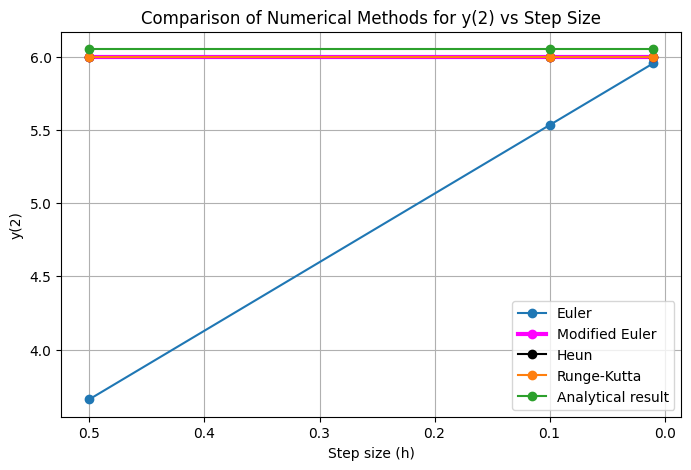

In [58]:
import pandas as pd
import math as m
f = lambda x, y: 4 * x / m.pow(1 + m.pow(x, 2), 1 / 3)

hArr = [0.5, 0.1, 0.01]
analitic = lambda x: 3 * (1 + x ** 2) ** (2/3) - 2.722
x0, y0, x1 = -2, 6, 2
results = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
errors = {"euler": [], "modified": [], "katt": [], "heun": [], "analytic": []}
for h in hArr:
    results["euler"].append(euler(x0, y0, h, x1)[1])
    results["modified"].append(modifiedEuler(x0, y0, h, x1)[1])
    results["heun"].append(heun(x0, y0, h, x1)[1])
    results["katt"].append(rungyKatt(x0, y0, h, x1)[1])
    results["analytic"].append(analitic(x1))

    errors["euler"].append(euler(x0, y0, h, x1)[1] - analitic(x1))
    errors["modified"].append(modifiedEuler(x0, y0, h, x1)[1] - analitic(x1))
    errors["heun"].append(heun(x0, y0, h, x1)[1] - analitic(x1))
    errors["katt"].append(rungyKatt(x0, y0, h, x1)[1] - analitic(x1))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(hArr, results["euler"], marker='o', label='Euler')
plt.plot(hArr, results["modified"], marker='o', label='Modified Euler', linewidth=3, color='magenta')
plt.plot(hArr, results["heun"], marker='o', label="Heun", color="black")
plt.plot(hArr, results["katt"], marker='o', label="Runge-Kutta")
plt.plot(hArr, results["analytic"], marker='o', label="Analytical result")

plt.xlabel('Step size (h)')
plt.ylabel('y(2)')
plt.title('Comparison of Numerical Methods for y(2) vs Step Size')
plt.legend()
plt.gca().invert_xaxis()  # Optional: to show decreasing h left-to-right
plt.grid(True)
plt.show()

## Tabelaryczne przedstawienie wyników metod

In [59]:
df_results = pd.DataFrame({
    'h': hArr,
    'Euler': results['euler'],
    'Euler error': errors['euler'],
    'Modified Euler': results['modified'],
    'Modified Euler error': errors['modified'],
    'Heun': results['heun'],
    'Heun error': errors['heun'],
    'Runge-Kutta': results['katt'],
    'Runge-Kutta error': errors['katt'],
    'Analytical': results['analytic']
})
df_results

,h,Euler,Euler error,Modified Euler,Modified Euler error,Heun,Heun error,Runge-Kutta,Runge-Kutta error,Analytical
0,0.50,3.660786,-2.389267,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
1,0.10,5.532157,-0.517896,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053
2,0.01,5.953216,-0.096837,6.0,-0.050053,6.0,-0.050053,6.0,-0.050053,6.050053


## Utworzenie wykresu przedstawiającego pośrednie wartości wyliczane podczas wyznaczania wartości funkcji z zależności od kroku

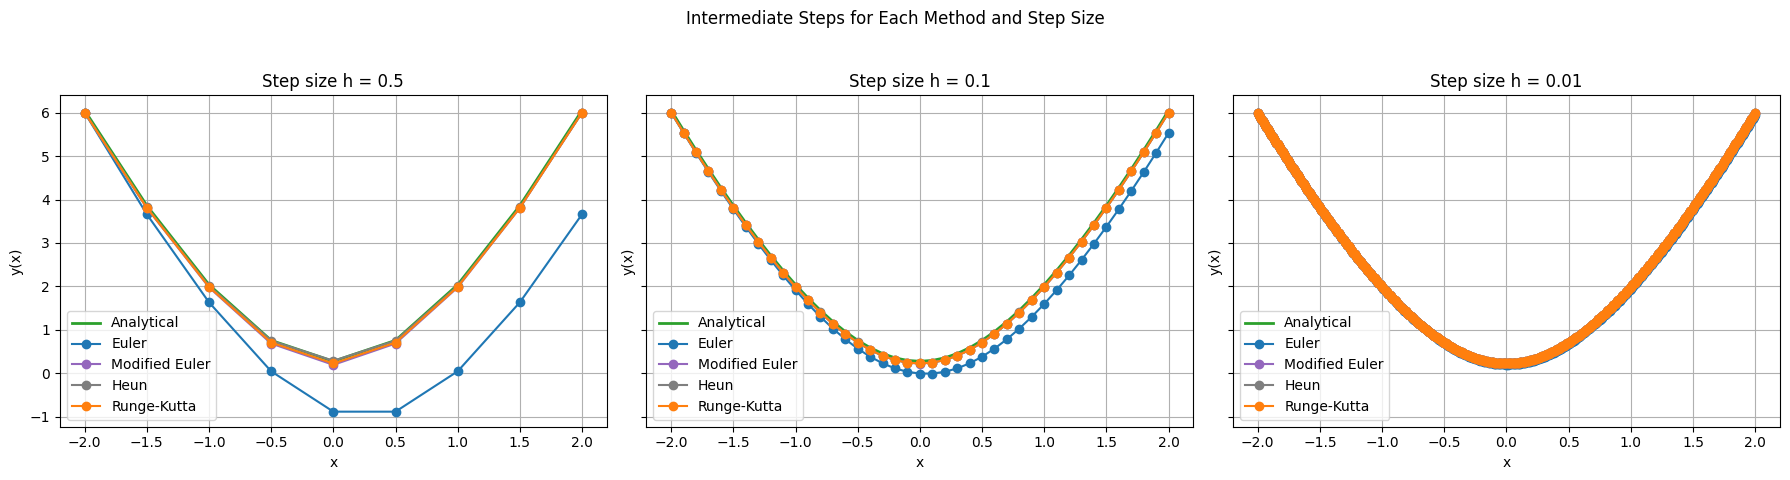

In [ ]:
def euler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x, y)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def modifiedEuler_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += h * f(x + 0.5*h, y + 0.5*h*f(x, y))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def heun_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        y += 0.5 * h * (f(x, y) + f(x + h, y + h * f(x, y)))
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def rungyKatt_points(x, y, h, target):
    xs, ys = [x], [y]
    while x < target:
        k1 = f(x, y)
        k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6*(k1 + 2 * k2 + 2 * k3 + k4)
        x += h
        xs.append(x)
        ys.append(y)
    return xs, ys

def analytic_points(x0, x1, h):
    xs = []
    ys = []
    x = x0
    while x <= x1 + 1e-10:
        xs.append(x)
        ys.append(3 * (1 + x ** 2) ** (2/3) - 2.722)
        x += h
    return xs, ys

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
h_labels = [str(h) for h in hArr]
methods = [
    ('Euler', euler_points, 'tab:blue'),
    ('Modified Euler', modifiedEuler_points, 'tab:purple'),
    ('Heun', heun_points, 'tab:gray'),
    ('Runge-Kutta', rungyKatt_points, 'tab:orange'),
]

for idx, (h, label) in enumerate(zip(hArr, h_labels)):
    # Plot analytical solution
    xs_analytic, ys_analytic = analytic_points(x0, x1, h)
    axs[idx].plot(xs_analytic, ys_analytic, label='Analytical', color='tab:green', linewidth=2)
    # Plot each method
    for name, func, color in methods:
        xs, ys = func(x0, y0, h, x1)
        axs[idx].plot(xs, ys, marker='o', label=name, color=color)
    axs[idx].set_title(f"Step size h = {label}")
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('y(x)')
    axs[idx].grid(True)
    axs[idx].legend()

plt.suptitle('Intermediate Steps for Each Method and Step Size')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Analiza wyników
### Wnioski z analizy numerycznej

- **Dokładność metod:**
    - Nawet dla największego kroku wszystkie metody poza Eulera są bardzo dokładne.
    - Wraz ze zmniejszaniem kroku integracji ($h$) wykresy metod zmodyfikowanego Eulera, Heuna oraz Rungego-Kutty praktycznie pokrywają się z rozwiązaniem analitycznym.
    - Dla najmniejszego kroku różnice są pomijalne.

- **Metoda Eulera:**
    - Jest najszybsza, ale wykazuje największy błąd, szczególnie przy większych krokach.
    - Zmniejszanie $h$ poprawia dokładność tej metody, co widać po malejącym błędzie.

- **Metody wyższego rzędu:**
    - Zmodyfikowany Euler, Heun i Runge-Kutta zapewniają bardzo wysoką dokładność nawet przy większych krokach.
    - Różnice między nimi są minimalne i praktycznie niezauważalne dla małych $h$.

- **Rekomendacje:**
    - Wybór metody powinien zależeć od wymaganej dokładności i dostępnych zasobów obliczeniowych.
    - Dla wysokiej precyzji zalecane są metody wyższego rzędu.
    - Dla szybkich, przybliżonych obliczeń można rozważyć Eulera z małym krokiem.

**Podsumowanie:**  
Metody wyższego rzędu są zdecydowanie bardziej efektywne dla rozważanego równania różniczkowego, zapewniając wysoką dokładność nawet przy większych krokach. Metoda Eulera może być stosowana do szybkich obliczeń, ale tylko przy odpowiednio małym kroku.

## Porównanie wydajności czasowej metod

In [66]:
import time

# Funkcje do pomiaru czasu działania każdej metody
def time_method(method, x, y, h, target):
    start = time.perf_counter()
    method(x, y, h, target)
    end = time.perf_counter()
    return end - start

timings = {
    'h': [],
    'Euler': [],
    'Modified Euler': [],
    'Heun': [],
    'Runge-Kutta': []
}

for h_val in hArr:
    timings['h'].append(h_val)
    timings['Euler'].append(time_method(euler, x0, y0, h_val, x1))
    timings['Modified Euler'].append(time_method(modifiedEuler, x0, y0, h_val, x1))
    timings['Heun'].append(time_method(heun, x0, y0, h_val, x1))
    timings['Runge-Kutta'].append(time_method(rungyKatt, x0, y0, h_val, x1))

df_timings = pd.DataFrame(timings)
df_timings

,h,Euler,Modified Euler,Heun,Runge-Kutta
0,0.50,0.000014,0.000013,0.000017,0.000024
1,0.10,0.000026,0.000048,0.000068,0.000100
2,0.01,0.000230,0.000647,0.001043,0.001242


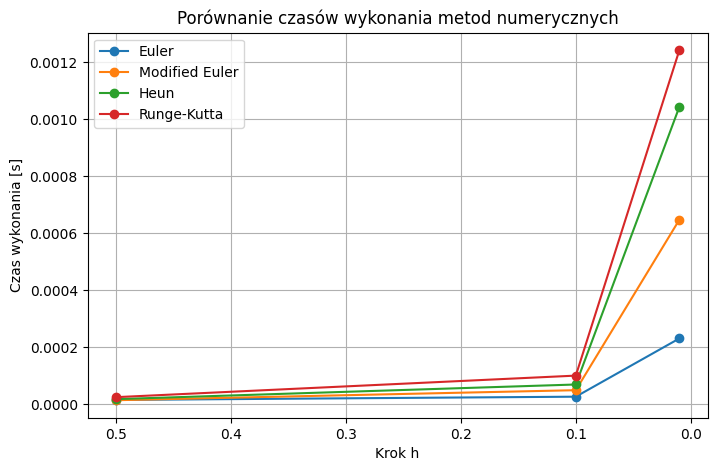

In [ ]:
plt.figure(figsize=(8, 5))
methods = ['Euler', 'Modified Euler', 'Heun', 'Runge-Kutta']
for method in methods:
    plt.plot(df_timings['h'], df_timings[method], marker='o', label=method)
plt.xlabel('Krok h')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie czasów wykonania metod numerycznych')
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

Dla każdej z funkcji czas wykonania rośnie odwrotnie proporcjonalnie do rozmiaru kroku. Wyraźnie najszybszą metodą jest najmniej dokładny Euler, a następnie jego dużo dokładniejsza zmodyfikowana wersja. Dla każdego z przypadków najwolniejszą metodą jest Runge-Kutta.
**Podsumowanie:**
- Im mniejszy krok, tym dłuższy czas obliczeń dla każdej metody.
- Euler jest najszybszy, ale najmniej dokładny.
- Runge-Kutta jest najwolniejsza, ale zapewnia najwyższą dokładność.